In [1]:
# Bibliotecas
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando dados
data = pd.read_csv('expectativa_vida.csv')

In [3]:
# Tratando o database
data.set_index(['Country Name', 'Year'], inplace=True)
variables = data.drop(columns=['Country Code', 'Region', 'Corruption','Injuries', 'Communicable', 'NonCommunicable'])
variables = variables.dropna()
df = variables.reset_index()

In [4]:
# Modelando 
formula = 'Q("Life Expectancy World Bank") ~ Q("Prevelance of Undernourishment") + Q("CO2") + Q("Health Expenditure %") + Q("Education Expenditure %") + Q("Unemployment") + Q("Sanitation") + C(Q("Country Name")) + C(Q("IncomeGroup"))'
fixed_effects_model = smf.ols(formula, data=df).fit(cov_type='cluster', cov_kwds={'groups': df['Country Name']})
fixed_effects_model.summary()

/Users/victor/.pyenv/versions/3.12.0/lib/python3.12/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 97, but rank is 6
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Q("Life Expectancy World Bank")   R-squared:                       0.974
Model:                                         OLS   Adj. R-squared:                  0.972
Method:                              Least Squares   F-statistic:                     11.22
Date:                             Wed, 24 Jul 2024   Prob (F-statistic):           2.88e-09
Time:                                     15:30:28   Log-Likelihood:                -2271.9
No. Observations:                             1296   AIC:                             4734.
Df Residuals:                                 1201   BIC:                             5225.
Df Model:                                       94                                         
Covariance Type:                           cluster                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           62.8207      2.117     29.676      0.000      58.672      66.970
C(Q("Country Name"))[T.Algeria]                      8.6317      0.821     10.507      0.000       7.022      10.242
C(Q("Country Name"))[T.Argentina]                   -4.3518      0.514     -8.461      0.000      -5.360      -3.344
C(Q("Country Name"))[T.Armenia]                     -5.2372      0.655     -7.998      0.000      -6.521      -3.954
C(Q("Country Name"))[T.Australia]                    6.4589      0.379     17.036      0.000       5.716       7.202
C(Q("Country Name"))[T.Austria]                     -0.9382      0.687     -1.366      0.172      -2.285       0.408
C(Q("Country Name"))[T.Azerbaijan]                  -2.5792      0.744     -3.466      0.001      -4.038      -1.121
C(Q("Country Name"))[T.Bangladesh]                   3.8489      0.564      6.827      0.000       2.744       4.954
C(Q("Country Name"))[T.Belarus]                    -11.2658      1.079    -10.441      0.000     -13.381      -9.151
C(Q("Country Name"))[T.Belgium]                      1.9753      0.426      4.634      0.000       1.140       2.811
C(Q("Country Name"))[T.Bolivia]                      0.1329      0.646      0.206      0.837      -1.134       1.400
C(Q("Country Name"))[T.Brazil]                      -4.1863      0.588     -7.118      0.000      -5.339      -3.034
C(Q("Country Name"))[T.Bulgaria]                    -5.8378      0.327    -17.861      0.000      -6.478      -5.197
C(Q("Country Name"))[T.Canada]                       2.9239      0.372      7.857      0.000       2.195       3.653
C(Q("Country Name"))[T.Central African Republic]    -5.9755      1.079     -5.536      0.000      -8.091      -3.860
C(Q("Country Name"))[T.Chad]                        -3.0567      0.487     -6.274      0.000      -4.012      -2.102
C(Q("Country Name"))[T.Chile]                        4.3652      0.325     13.439      0.000       3.729       5.002
C(Q("Country Name"))[T.China]                        5.2008      2.197      2.368      0.018       0.896       9.506
C(Q("Country Name"))[T.Colombia]                     2.8256      0.772      3.660      0.000       1.313       4.339
C(Q("Country Name"))[T.Costa Rica]                   2.0874      0.580      3.597      0.000       0.950       3.225
C(Q("Country Name"))[T.Croatia]                      0.2176      0.267      0.815      0.415      -0.306       0.741
C(Q("Country Name"))[T.Cuba]                        -1.5398      1.256     -1.226      0.220      -4.002       0.923
C(Q("Country Na

In [5]:
# Calculando os valores previstos
df['predicted'] = fixed_effects_model.fittedvalues
# Calculando os resíduos
df['residuals'] = fixed_effects_model.resid


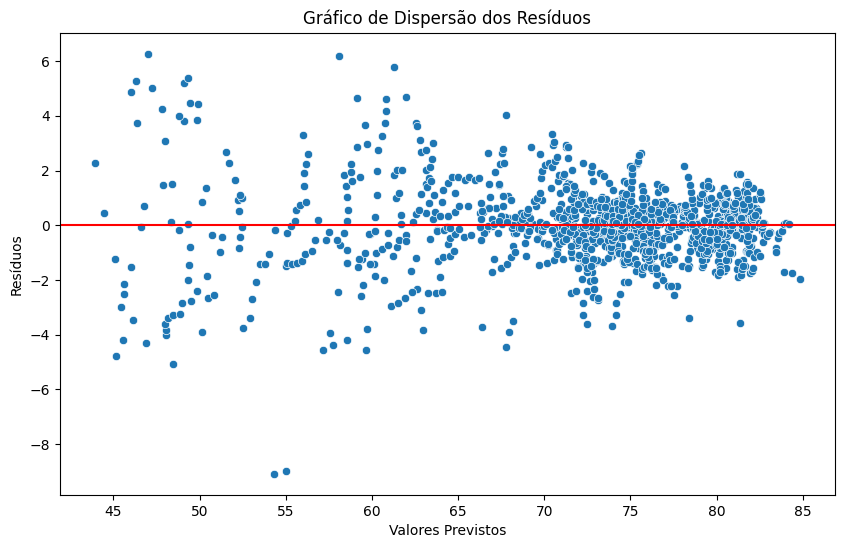

In [6]:
# Gráfico de dispersão 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted', y='residuals', data=df)
plt.axhline(y=0, color='red', linestyle='-') 
plt.title('Gráfico de Dispersão dos Resíduos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.grid(False)
plt.show()